# Breast Cancer Dataset

In [1]:
from runner import run

arg_dict = {
    'dataset': 'breast', 
    'lr': 0.001, 
    'hidsize': 8, 
    'episodes': 100, 
    'batchsize': 10, 
    'test_size': 0.25,
    'dropout': 0.
}

$e_0=0, e_1=0$

{'dataset': 'breast', 'lr': 0.001, 'hidsize': 8, 'episodes': 100, 'batchsize': 10, 'test_size': 0.25, 'dropout': 0.0, 'e0': 0, 'e1': 0}


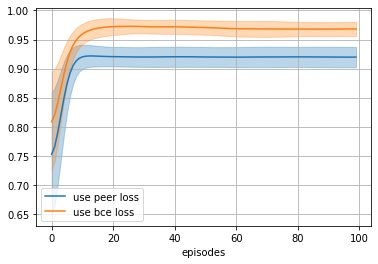

--------------------------------------
| knn                     | 0.972    |
| logistic regression     | 0.981    |
| nn                      | 0.973    |
| nn with peer prediction | 0.922    |
| random forest           | 0.981    |
| svm                     | 0.981    |
--------------------------------------


In [2]:
arg_dict.update({'e0': 0, 'e1': 0})
run(arg_dict.copy())

$e_0=0.2, e_1=0.2$

{'dataset': 'breast', 'lr': 0.001, 'hidsize': 8, 'episodes': 100, 'batchsize': 10, 'test_size': 0.25, 'dropout': 0.0, 'e0': 0.2, 'e1': 0.2}


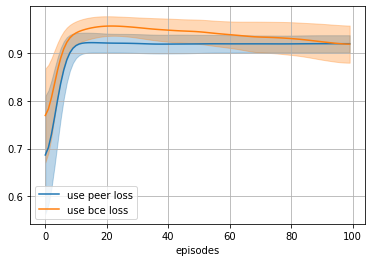

--------------------------------------
| knn                     | 0.906    |
| logistic regression     | 0.906    |
| nn                      | 0.958    |
| nn with peer prediction | 0.923    |
| random forest           | 0.962    |
| svm                     | 0.991    |
--------------------------------------


In [6]:
arg_dict.update({'e0': 0.2, 'e1': 0.2})
run(arg_dict.copy())

$e_0=0.1, e_1=0.3$

{'dataset': 'breast', 'lr': 0.001, 'hidsize': 8, 'episodes': 100, 'batchsize': 10, 'test_size': 0.25, 'dropout': 0.0, 'e0': 0.1, 'e1': 0.3}


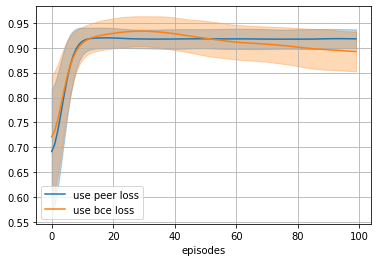

--------------------------------------
| knn                     | 0.84     |
| logistic regression     | 0.83     |
| nn                      | 0.934    |
| nn with peer prediction | 0.92     |
| random forest           | 0.849    |
| svm                     | 0.915    |
--------------------------------------


In [3]:
arg_dict.update({'e0': 0.1, 'e1': 0.3})
run(arg_dict.copy())

$e_0=0.2, e_1=0.4$

{'dataset': 'breast', 'lr': 0.001, 'hidsize': 8, 'episodes': 100, 'batchsize': 10, 'test_size': 0.25, 'dropout': 0.0, 'e0': 0.2, 'e1': 0.4}


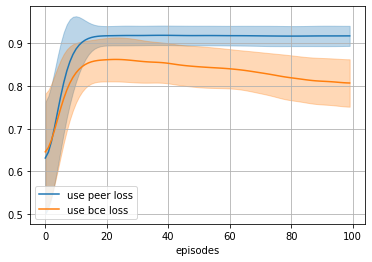

--------------------------------------
| knn                     | 0.708    |
| logistic regression     | 0.783    |
| nn                      | 0.862    |
| nn with peer prediction | 0.919    |
| random forest           | 0.792    |
| svm                     | 0.802    |
--------------------------------------


In [4]:
arg_dict.update({'e0': 0.2, 'e1': 0.4})
run(arg_dict.copy())

$e_0 = 0.4, e_1 = 0.4$

{'dataset': 'breast', 'lr': 0.001, 'hidsize': 8, 'episodes': 100, 'batchsize': 10, 'test_size': 0.25, 'dropout': 0.0, 'e0': 0.4, 'e1': 0.4}


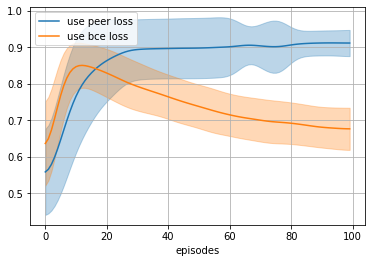

--------------------------------------
| knn                     | 0.726    |
| logistic regression     | 0.745    |
| nn                      | 0.852    |
| nn with peer prediction | 0.912    |
| random forest           | 0.717    |
| svm                     | 0.792    |
--------------------------------------


In [5]:
arg_dict.update({'e0': 0.4, 'e1': 0.4})
run(arg_dict.copy())